<b>COMPUTER ENGINEERING

CEN481 - INTRODUCTION TO DATA MINING

ALGORITHM : K-Nearest Neighbour

Ali Can SARIBOĞA

2019556055</b>

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [ ]:
# DRIVE CONNECTION

In [ ]:
# reading dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataMining/Acoustic Features.csv')


In [ ]:
data.head()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           400 non-null    object 
 1   _RMSenergy_Mean                                 400 non-null    float64
 2   _Lowenergy_Mean                                 400 non-null    float64
 3   _Fluctuation_Mean                               400 non-null    float64
 4   _Tempo_Mean                                     400 non-null    float64
 5   _MFCC_Mean_1                                    400 non-null    float64
 6   _MFCC_Mean_2                                    400 non-null    float64
 7   _MFCC_Mean_3                                    400 non-null    float64
 8   _MFCC_Mean_4                                    400 non-null    float64
 9   _MFCC_Mean_5                               

In [ ]:
# number of the data in each class
song_types = data["Class"].value_counts()
song_types_df = pd.DataFrame(song_types)
song_types_df = song_types.reset_index(level = 0)
song_types_df

,index,Class
0,relax,100
1,happy,100
2,sad,100
3,angry,100


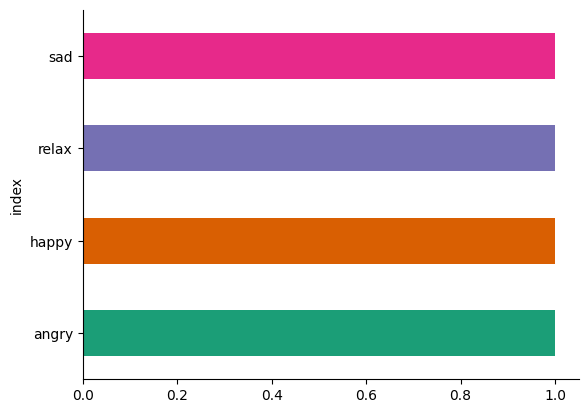

In [ ]:
song_types_df.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# controlling null value
data.isnull().any().sum()

0

In [ ]:
# distribution percentage of data according to classes
data.Class.value_counts(normalize=True)

relax    0.25
happy    0.25
sad      0.25
angry    0.25
Name: Class, dtype: float64

In [ ]:
# about attributes
data.describe().T

,count,mean,std,min,25%,50%,75%,max
_RMSenergy_Mean,400.0,0.134650,0.064368,0.010,0.08500,0.1280,0.17400,0.431
_Lowenergy_Mean,400.0,0.553605,0.050750,0.302,0.52300,0.5530,0.58325,0.703
_Fluctuation_Mean,400.0,7.145932,2.280145,3.580,5.85950,6.7340,7.82350,23.475
_Tempo_Mean,400.0,123.682020,34.234344,48.284,101.49025,120.1325,148.98625,195.026
_MFCC_Mean_1,400.0,2.456422,0.799262,0.323,1.94850,2.3895,2.86025,5.996
_MFCC_Mean_2,400.0,0.071890,0.537865,-3.484,-0.26275,0.0685,0.41325,1.937
_MFCC_Mean_3,400.0,0.488065,0.294607,-0.870,0.28125,0.4645,0.68600,1.622
_MFCC_Mean_4,400.0,0.030465,0.275839,-1.636,-0.11700,0.0445,0.19825,1.126
_MFCC_Mean_5,400.0,0.178897,0.195230,-0.494,0.06125,0.1810,0.28850,1.055
_MFCC_Mean_6,400.0,0.038307,0.203754,-0.916,-0.07825,0.0495,0.15125,0.799


In [ ]:
# Correlation
data_lr_corr = data.select_dtypes('number').corr()

<Axes: >

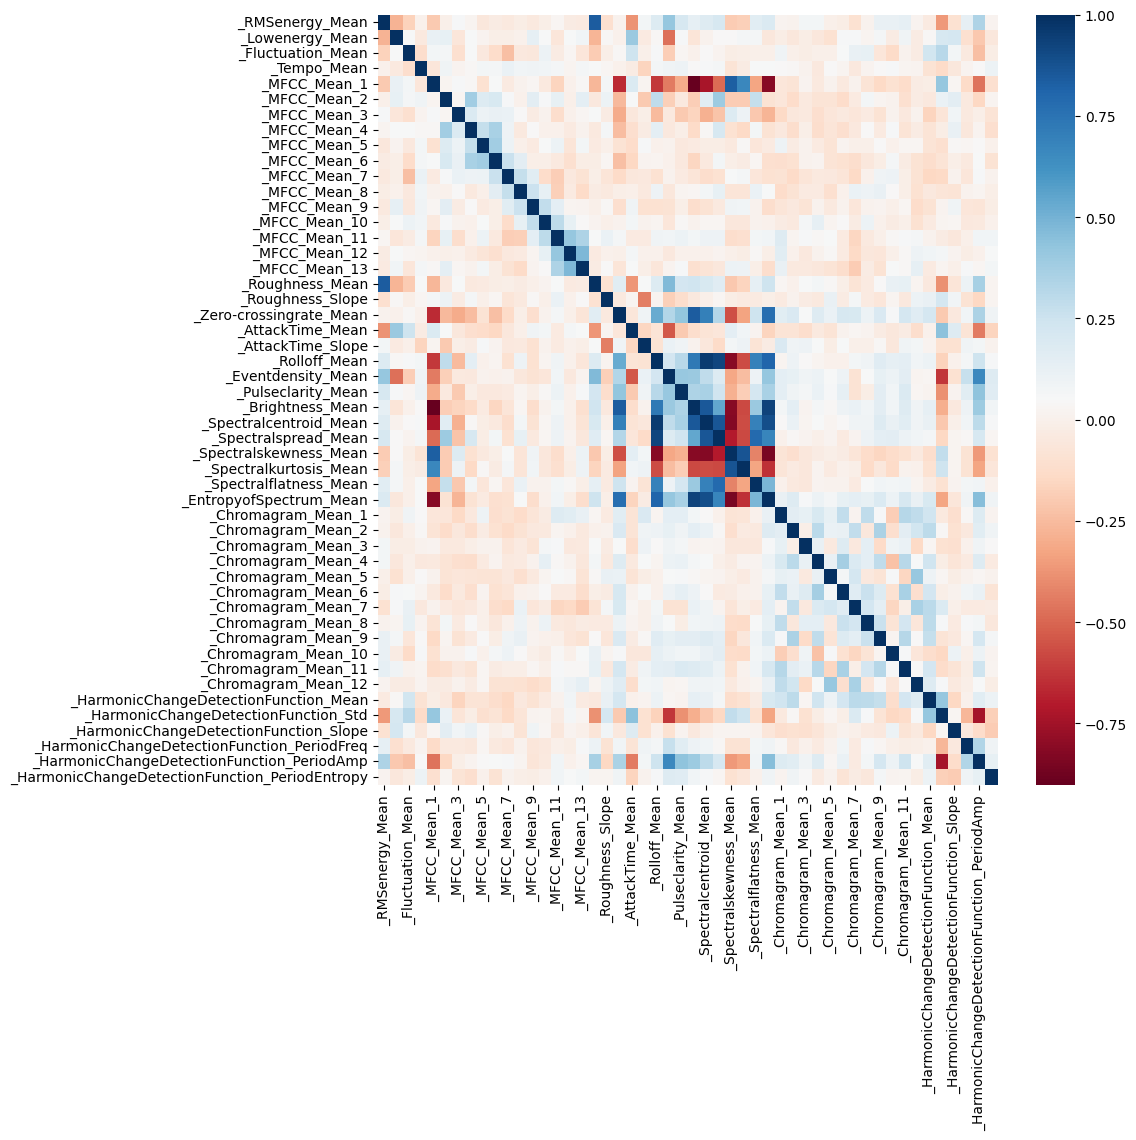

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data_lr_corr,cmap='RdBu')

<Axes: >

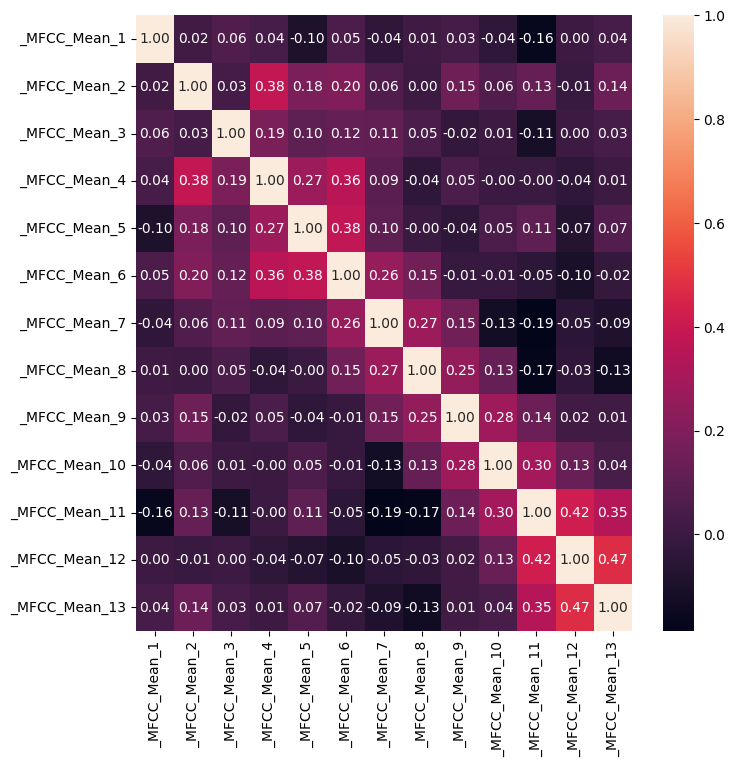

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(data.filter(like='MFCC').corr(),annot=True,fmt = '.2f')

<Axes: >

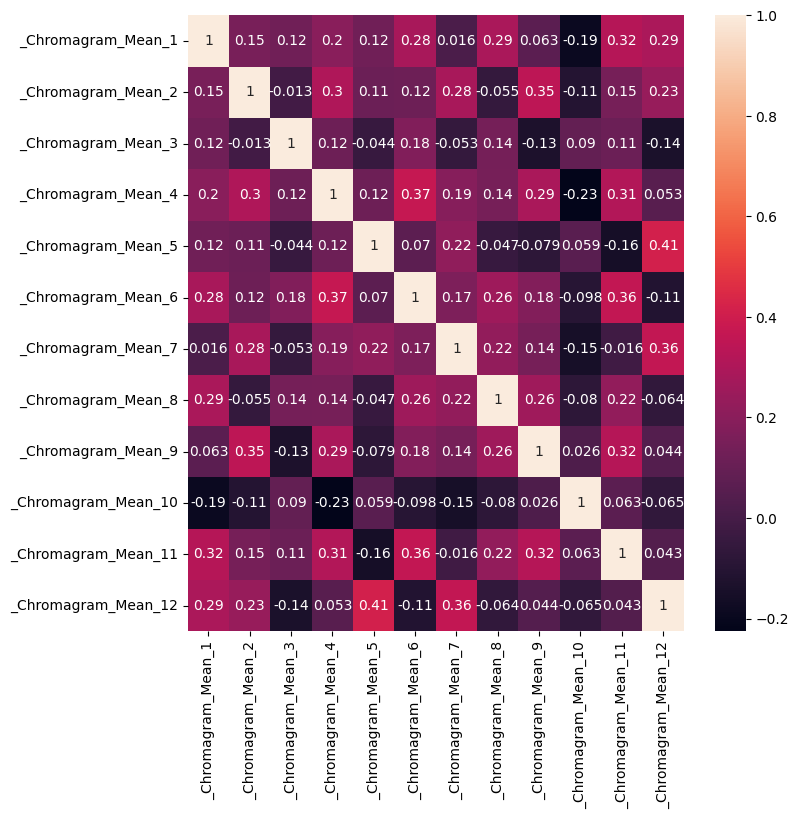

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(data.filter(like='Chroma').corr(),annot=True)

In [ ]:
# importing knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedShuffleSplit
from sklearn.metrics import classification_report, accuracy_score,precision_recall_fscore_support, recall_score,f1_score, ConfusionMatrixDisplay, confusion_matrix
import time

In [ ]:
X = data.drop('Class', axis = 1)
y = data.loc[:,'Class']

In [ ]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state = 20,
                                                    stratify=y)

In [ ]:
# label encoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [ ]:
# standart scaler
mm = StandardScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

In [ ]:
def get_metric(model,y_test,y_pred):
    """create a series frame showing the accuracy, precision, f1 and recall scores"""
    metric ={}
    metric ['accuracy'] = accuracy_score(y_test,y_pred)
    precision,recall,f_score,support = precision_recall_fscore_support(y_test,y_pred,average='weighted')
    metric['precision'], metric ['recall'] ,metric ['f1']= precision,recall,f_score
    metric ['train score'] = model.score(X_train,y_train)
    return pd.Series(metric)

In [ ]:
# selecting best k value for the model
score ={}

for n in range(2,50):
    knn_ = KNeighborsClassifier(n).fit(X_train,y_train)
    score[n] = knn_.score(X_test,y_test)
k_ = max(score, key = score.get)
k_

10

In [ ]:
# KNN Model
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=k_)
knn.fit(X_train,y_train)
prediction_duration = time.time() - start_time
knn.score(X_test,y_test)

0.7625

In [ ]:
# knn parameters for cross validation
param_grid = {
    'n_neighbors':list(range(2,50)),
    'metric' : ['euclidean','minkowski']
}

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
# Cross Validation
start_time = time.time()
knn_grid = GridSearchCV(KNeighborsClassifier(),
                        param_grid=param_grid,
                        scoring='accuracy',
                        cv=(StratifiedKFold(n_splits = 10,
                                            shuffle = True,
                                            random_state = 20)))
knn_grid.fit(X_train,y_train)
train_pred = knn_grid.predict(X_train)
test_pred = knn_grid.predict(X_test)
cv_duration = time.time() - start_time

In [ ]:
knn_grid.score(X_test,y_test)

0.7125

In [ ]:
knn_grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 19}

In [ ]:
# Prediction
start_time = time.time()
y_pred_cv = knn_grid.predict(X_test)
prediction_duration = time.time() - start_time

In [ ]:
def get_metrics2(y_true, y_pred, duration):
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred, average='weighted')
    precision, _, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    return accuracy, recall, precision, f1, duration

In [ ]:
# measurement of train and test
train_accuracy, train_recall, train_precision, train_f1, _ = get_metrics2(y_train, train_pred, 0)
test_accuracy, test_recall, test_precision, test_f1, _ = get_metrics2(y_test, test_pred, prediction_duration)

In [ ]:
# comparison between Knn model and Knn cross validation
print("KNN AND KNN_GRID (Cross Validation)\n")
pd.concat([get_metric(knn,y_test,knn.predict(X_test)),
           get_metric(knn_grid,y_test,knn_grid.predict(X_test))],
          axis = 1).rename(columns={0:'knn',1:'knn_grid'})

KNN AND KNN_GRID (Cross Validation)



,knn,knn_grid
accuracy,0.762500,0.712500
precision,0.767474,0.714510
recall,0.762500,0.712500
f1,0.755296,0.700123
train score,0.775000,0.771875


In [ ]:
# performances
print("PERFORMANCE OF TEST AND TRAIN\n")
result_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score', 'Prediction Duration'],
    'Train': [train_accuracy, train_recall, train_precision, train_f1, 0],
    'Test': [test_accuracy, test_recall, test_precision, test_f1, prediction_duration]
})
print(result_df)

PERFORMANCE OF TEST AND TRAIN

                Metric     Train      Test
0             Accuracy  0.771875  0.712500
1               Recall  0.771875  0.712500
2            Precision  0.781736  0.714510
3             F1 Score  0.761081  0.700123
4  Prediction Duration  0.000000  0.008998


In [ ]:
# Results
print("MODEL(knn_grid) RESULTS\n")
print("Best parameters:", knn_grid.best_params_)
print("Average score:", knn_grid.best_score_)
print(f"Training time: {knn_grid.cv_results_['mean_fit_time'][knn_grid.best_index_]:.4f} second")
print(f"Prediction time: {prediction_duration:.4f} second")
print(f"Cross-validation time: {knn_grid.cv_results_['mean_score_time'][knn_grid.best_index_]:.4f} second")

MODEL(knn_grid) RESULTS

Best parameters: {'metric': 'euclidean', 'n_neighbors': 19}
Average score: 0.734375
Training time: 0.0007 second
Prediction time: 0.0090 second
Cross-validation time: 0.0043 second


In [ ]:
conf = confusion_matrix(y_test,y_pred_cv)
print("Confusion Matrix:")
print(conf)

Confusion Matrix:
[[16  2  1  1]
 [ 1 19  0  0]
 [ 3  2  9  6]
 [ 2  3  2 13]]


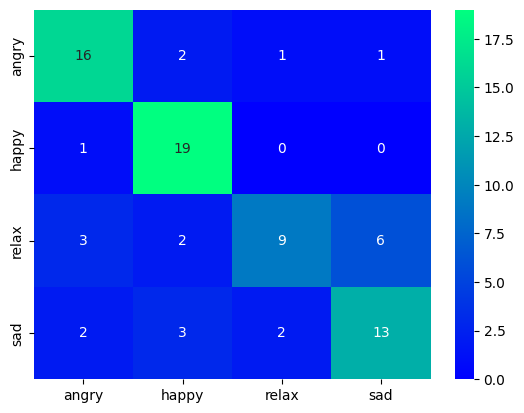

In [ ]:
# Creating heatmap with test data
ax = sns.heatmap(conf,
                 xticklabels=le.classes_,
                 yticklabels = le.classes_,
                 annot= True,
                 cmap = 'winter')

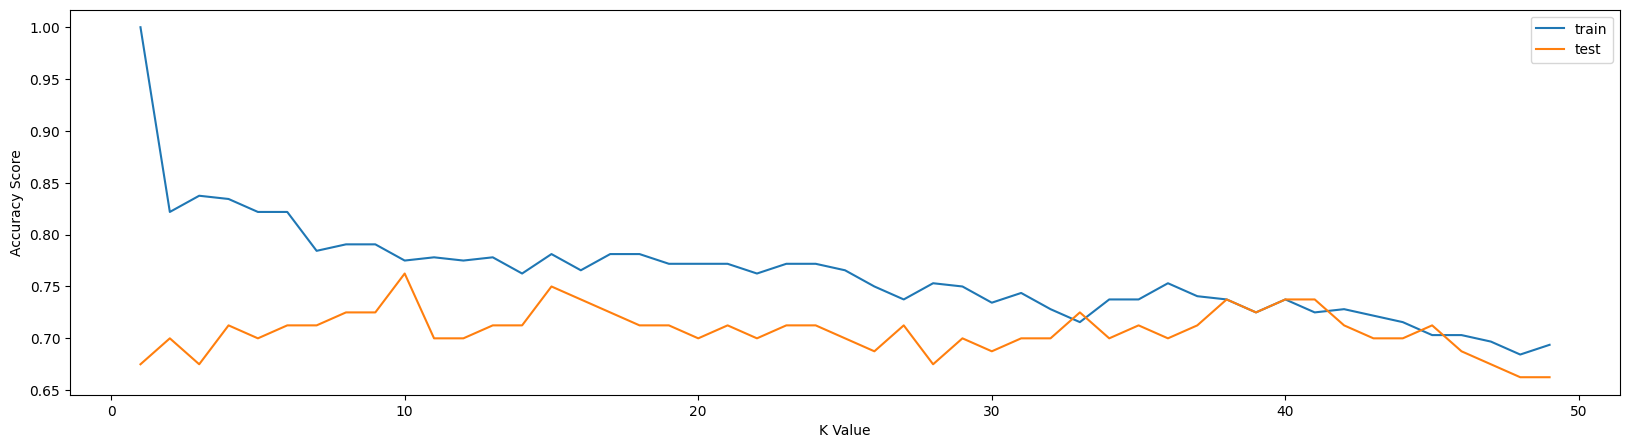

In [ ]:
# variation of train and test accuracy according to k value
uzunluk = range(1,50)
error1= []
error2= []
for k in uzunluk:
    classifier= KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train,y_train)
    error1.append(classifier.score(X_train, y_train))
    error2.append(classifier.score(X_test, y_test))

plt.figure(figsize=(20,5))
plt.plot(uzunluk,error1,label="train")
plt.plot(uzunluk,error2,label="test")
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')
plt.legend()

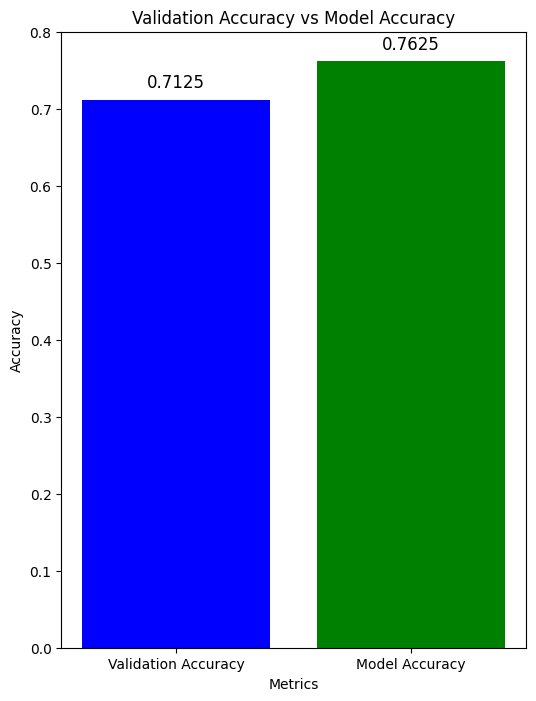

In [ ]:
# Tags and values
labels = ['Validation Accuracy', 'Model Accuracy']
values = [(knn_grid.score(X_test,y_test)), (knn.score(X_test,y_test))]

# Creating bar chart
plt.figure(figsize=(6, 8))
plt.bar(labels, values, color=['blue', 'green'])

# Show values
for i, value in enumerate(values):
    plt.text(i, value + 0.01, f"{value:.4f}", ha='center', va='bottom', fontsize=12)

# Axes and head
plt.xlabel('Metrics')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy vs Model Accuracy')

plt.show()